<img style="float: right;" src="unifor.jpg" width="250px">
<font size="5" face="Arial">
    <b>Universidade de Fortaleza</b>
</font><br>
<font size="3" face="Arial">
    <b>Programa de Pós-Graduação em Informática Aplicada - PPGIA <br>
Disciplina: Análise de Dados em Grafos <br>
Prof.: Raimir Filho <br>
Aluno: Ricardo Gleidson de Vasconcelos <br>
    </b>
</font>

# Identificação de pontes em grafos não direcionados

#### Importando bibliotecas

In [1]:
from collections import defaultdict
from collections import OrderedDict
import numpy as np
from igraph import *

dict_cores = {1: 'orange', 2: 'blue', 3: 'gray', 4: 'green', 5: 'yellow', 6: 'red'}

#### Definindo a classe Grafo e seu métodos

In [2]:
class Grafo:
    
    def __init__(self):
        self.n = 0 # número de vértices
        self.grafo = defaultdict(list) # armazena a estrutura do grafo em um dicionário (vértice: [lista de adjacencia])
        self.cores_vertices = {} # armazena as cores dos vértices em um dicionário (vértice: cor do vértice)
        
    def adicionaAresta(self, u, v):
        self.grafo[u].append(v)
        self.grafo[v].append(u)
        self.cores_vertices[u] = ''
        self.cores_vertices[v] = ''
        self.n = len(self.grafo.keys())
        
    def dfs(self, u):
        self.t += 1
        self.visitado[u] = True
        self.tempo_visita[u] = self.t
        self.menor_tempo_visita[u] = self.t
        
        # Avalia os vizinhos de "u" atualizando o menor tempo de visita
        for v in self.grafo[u]:
            if self.visitado[v] == False:
                self.pai[v] = u
                # Executa recursivamente o método DFS
                self.dfs(v)
                
                self.menor_tempo_visita[u] = min(self.menor_tempo_visita[u], self.menor_tempo_visita[v])
                
                # Considerando a aresta (u, v), se o menor tempo de visita de "v" for maior que o tempo de visita de "u", 
                # então não há um caminho alternativo de "v" para "u" e a aresta (u, v) é uma ponte.
                if self.menor_tempo_visita[v] > self.tempo_visita[u]:
                    self.pontes.append([u, v])
                    
            # Se v não é pai de u então a aresta (u, v) é um "back edge" para um antepassado
            elif v != self.pai[u]:
                self.menor_tempo_visita[u] = min(self.menor_tempo_visita[u], self.tempo_visita[v])
                
    def encontraPonteGrafo(self):
        self.t = 0 # tempo de pesquisa
        self.visitado = [False]*self.n # identifica se o vértice já foi visitado
        self.tempo_visita = [float('Inf')]*self.n # armazena o valor do tempo de visita do vértice
        self.menor_tempo_visita = [float('Inf')]*self.n # armazena o menor tempo de visita entre os tempos de visita do vértice e de seus vizinhos
        self.pai = [-1]*self.n # armazena o pai do vértice visitado
        
        self.pontes = [] # guarda as pontes encontradas
        # Executa o método DFS (busca em profundidade) para cada vértice do grafo ainda não visitado
        for i in range(self.n):
            if self.visitado[i] == False:
                self.dfs(i)
        
        print('%d ponte(s) encontrada(s) ' % len(self.pontes))
        for u, v in self.pontes:
            print(u, '--', v)

    def corNaoUtilizadaPorVizinho(self, v: int, c: str):
        for k in self.grafo[v]:
            if self.cores_vertices[k] == c:
                return False
        return True

    def coloreGrafo(self):
        self.cores_vertices = OrderedDict(sorted(self.cores_vertices.items()))
        for v, _ in self.grafo.items():
            if self.cores_vertices[v] == '':
                for c in dict_cores.values():
                    if self.corNaoUtilizadaPorVizinho(v, c):
                        self.cores_vertices[v] = c
                        break


#### Preparando o grafo para impressão (iGraph)

In [3]:
def preparaImpressaoGrafo(g, arestas, cores_arestas):
    arestas.pop(0)
    for v, v_adj in g.grafo.items():
        for u in v_adj:
            flag_aresta_existe = False
            for a1, a2 in arestas:
                if (a1 == v and a2 == u) or (a1 == u and a2 == v):
                    flag_aresta_existe = True
            if not flag_aresta_existe:
                arestas.append((v, u))
                flag_ponte = False
                for k in g.pontes:
                    if (k[0] == v and k[1] == u) or (k[0] == v and k[1] == u):
                        flag_ponte = True
                if flag_ponte:
                    cores_arestas.append('red')
                else:
                    cores_arestas.append('gray')

#### Apresentando o grafo de exemplo 1

1 ponte(s) encontrada(s) 
2 -- 3


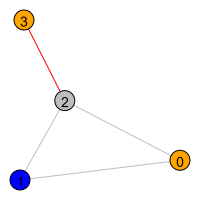

In [4]:
#Criando o grafo
g = Grafo()
g.adicionaAresta(0, 1)
g.adicionaAresta(0, 2)
g.adicionaAresta(1, 2)
g.adicionaAresta(2, 3)

g.coloreGrafo()
g.encontraPonteGrafo()

arestas = [()]
cores_arestas = []
preparaImpressaoGrafo(g, arestas, cores_arestas)

#Plotando o grafo utilizando a biblioteca do iGraph
g1 = Graph()
g1.add_vertices(g.n)
g1.add_edges(arestas)
plot(g1, layout='auto', 
     vertex_label=g.cores_vertices.keys(), 
     vertex_color=g.cores_vertices.values(), 
     edge_color=cores_arestas, bbox=(200, 200))

#### Apresentando o grafo de exemplo 2

2 ponte(s) encontrada(s) 
3 -- 4
2 -- 5


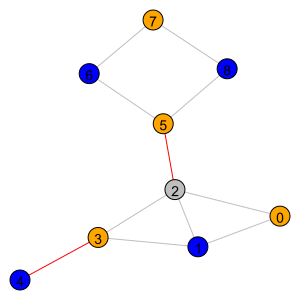

In [5]:
#Criando o grafo
g = Grafo()
g.adicionaAresta(0, 1)
g.adicionaAresta(0, 2)
g.adicionaAresta(1, 2)
g.adicionaAresta(1, 3)
g.adicionaAresta(2, 3)
g.adicionaAresta(2, 5)
g.adicionaAresta(3, 4)
g.adicionaAresta(5, 6)
g.adicionaAresta(5, 8)
g.adicionaAresta(6, 7)
g.adicionaAresta(7, 8)

g.coloreGrafo()
g.encontraPonteGrafo()

arestas = [()]
cores_arestas = []
preparaImpressaoGrafo(g, arestas, cores_arestas)

#Plotando o grafo utilizando a biblioteca do iGraph
g1 = Graph()
g1.add_vertices(g.n)
g1.add_edges(arestas)
plot(g1, layout='auto', 
     vertex_label=g.cores_vertices.keys(), 
     vertex_color=g.cores_vertices.values(), 
     edge_color=cores_arestas, bbox=(300, 300))

#### Apresentando o grafo de exemplo 3 (Mapa do Brasil)

3 ponte(s) encontrada(s) 
5 -- 4
25 -- 26
24 -- 25


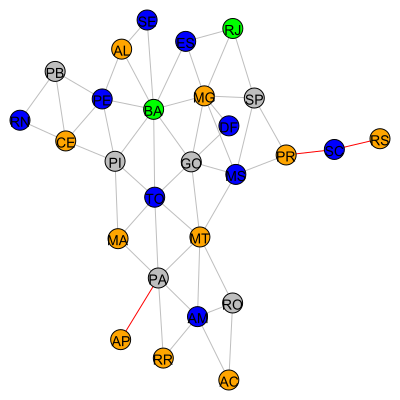

In [6]:
# Dicionário auxiliar com a descrição das UFs
vertices = {0: 'BA', 1: 'AM', 2: 'RR', 3: 'RO',  4: 'AP', 5: 'PA', 6: 'MT', 7: 'MS', 8: 'GO', 9: 'DF',
            10: 'TO', 11: 'MA', 12: 'PI', 13: 'CE', 14: 'RN', 15: 'PB', 16: 'PE', 17: 'AL', 18: 'SE',
            19: 'AC', 20: 'MG', 21: 'ES', 22: 'RJ', 23: 'SP', 24: 'PR', 25: 'SC', 26: 'RS'}

# Criando o grafo
g = Grafo()
g.adicionaAresta(19, 1)
g.adicionaAresta(19, 3)
g.adicionaAresta(1, 2) 
g.adicionaAresta(1, 3) 
g.adicionaAresta(1, 5) 
g.adicionaAresta(1, 6)
g.adicionaAresta(2, 5)
g.adicionaAresta(3, 6)
g.adicionaAresta(4, 5)
g.adicionaAresta(6, 5) 
g.adicionaAresta(6, 7) 
g.adicionaAresta(6, 8) 
g.adicionaAresta(6, 10)
g.adicionaAresta(7, 8) 
g.adicionaAresta(7, 20) 
g.adicionaAresta(7, 23) 
g.adicionaAresta(7, 24)
g.adicionaAresta(8, 9) 
g.adicionaAresta(8, 10) 
g.adicionaAresta(8, 0) 
g.adicionaAresta(8, 20)
g.adicionaAresta(9, 20)
g.adicionaAresta(10, 5) 
g.adicionaAresta(10, 11) 
g.adicionaAresta(10, 12) 
g.adicionaAresta(10, 0)
g.adicionaAresta(11, 5) 
g.adicionaAresta(11, 12)
g.adicionaAresta(12, 13) 
g.adicionaAresta(12, 16) 
g.adicionaAresta(12, 0)
g.adicionaAresta(13, 14) 
g.adicionaAresta(13, 15) 
g.adicionaAresta(13, 16)
g.adicionaAresta(14, 15)
g.adicionaAresta(15, 16)
g.adicionaAresta(16, 17) 
g.adicionaAresta(16, 0)
g.adicionaAresta(17, 18) 
g.adicionaAresta(17, 0)
g.adicionaAresta(18, 0)
g.adicionaAresta(0, 20) 
g.adicionaAresta(0, 21)
g.adicionaAresta(20, 21) 
g.adicionaAresta(20, 22) 
g.adicionaAresta(20, 23)
g.adicionaAresta(21, 22)
g.adicionaAresta(22, 23)
g.adicionaAresta(23, 24)
g.adicionaAresta(24, 25)
g.adicionaAresta(25, 26)

g.coloreGrafo()
g.encontraPonteGrafo()

arestas = [()]
cores_arestas = []
preparaImpressaoGrafo(g, arestas, cores_arestas)

#Plotando o grafo utilizando a biblioteca do iGraph
g1 = Graph()
g1.add_vertices(g.n)
g1.add_edges(arestas)
plot(g1, layout='auto', 
     vertex_label=vertices.values(), 
     vertex_color=g.cores_vertices.values(), 
     edge_color=cores_arestas, bbox=(400, 400))